In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
dataset = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df = dataset.copy()

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
#Number of rows & columns
df.shape

(4269, 13)

Total rows: 4269 <br>
Total columns: 13

Let's check the detail of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

So there are neither null values nor duplicated values in our dataset

Now let's explore each features

#### no_of_dependents: How many people rely on the applicant for money. It's used to understand how much financial pressure the applicant already has. More dependents might mean more expenses.

In [9]:
df[" no_of_dependents"].unique()

array([2, 0, 3, 5, 4, 1], dtype=int64)

Let's see distibution of it with respect to target

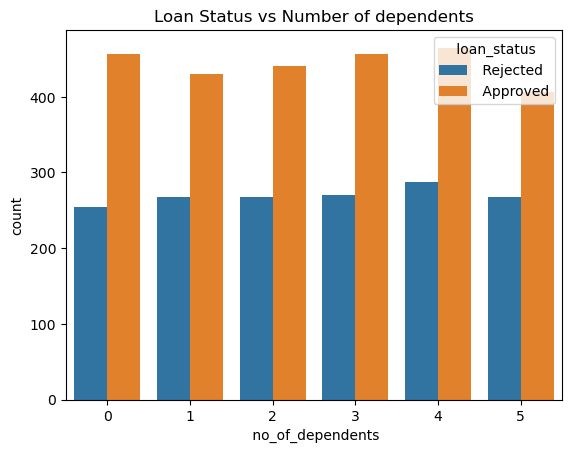

In [10]:
sns.countplot(x=" no_of_dependents", hue=" loan_status", data=df)
plt.title("Loan Status vs Number of dependents")
plt.show()

Having more dependents doesn't strongly affect loan approval.
Whether you have 0 or 5 dependents, the chances of loan approval are fairly similar.

<h4> Does having a co-applicant help get approved? <br>
Ans) Nope </h4>

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

#### Education

In [12]:
df[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

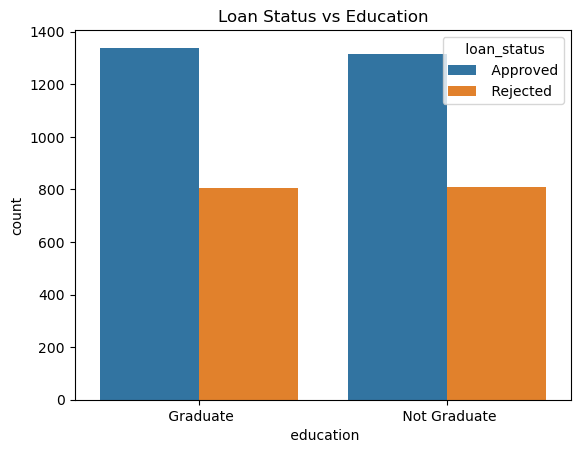

In [13]:
sns.countplot(x=" education", hue=" loan_status", data=df)
plt.title("Loan Status vs Education")
plt.show()

Education level (Graduate or Not) doesn’t have a strong impact on loan approval.
The approval rate seems almost equal for both categories

#### Self-Employed

In [14]:
df[" self_employed"].unique()

array([' No', ' Yes'], dtype=object)

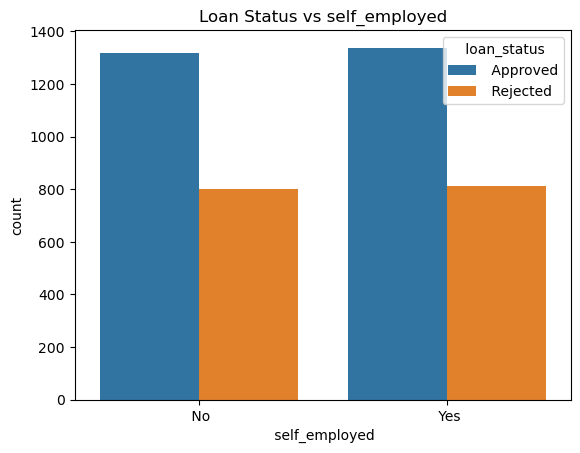

In [15]:
sns.countplot(x=" self_employed", hue=" loan_status", data=df)
plt.title("Loan Status vs self_employed")
plt.show()

<h4> Do graduates get approved more than non-graduates? <br>
Ans) No much difference in it also

#### income_annum

In [16]:
df[" income_annum"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name:  income_annum
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


<Axes: xlabel=' loan_status', ylabel=' income_annum'>

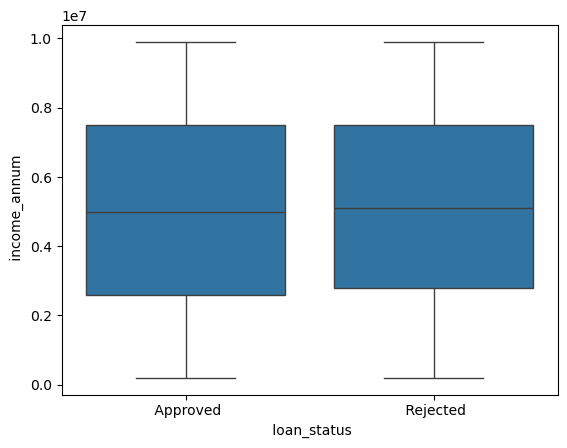

In [17]:
sns.boxplot(x=' loan_status', y=' income_annum', data=df)

In [18]:
df["loan_to_income"] = df[" loan_amount"] / df[" income_annum"]

<Axes: xlabel=' loan_status', ylabel='loan_to_income'>

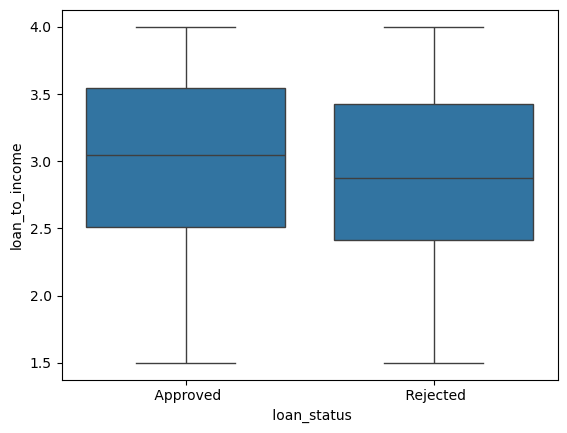

In [19]:
sns.boxplot(x=' loan_status', y='loan_to_income', data=df)

Mean value of approved have loan_to_income slightly greater

<h4> LoanAmount ÷ Income: any difference between approved and rejected? <br>
Mean value of approved have loan_to_income slightly greater
</h4>

In [20]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status',
       'loan_to_income'],
      dtype='object')

In [21]:
df[" loan_term"].unique()

array([12,  8, 20, 10,  4,  2, 18, 16, 14,  6], dtype=int64)

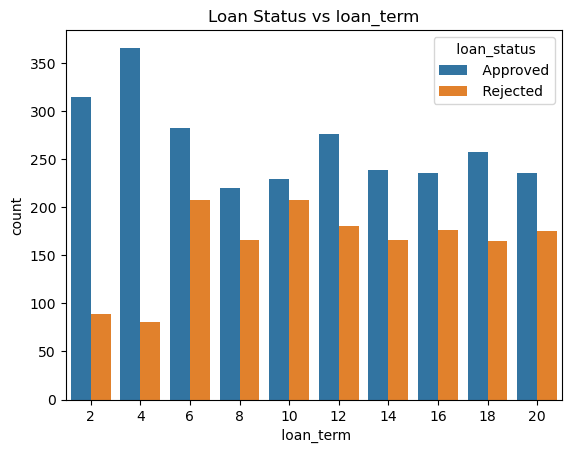

In [22]:
sns.countplot(x=" loan_term", hue=" loan_status", data=df)
plt.title("Loan Status vs loan_term")
plt.show()

Hence, loan with less term is approved more and rejected less, where as converse is true

<h4>Loan term: Do short or long loans get approved more? <br>
Ans) Short loans between 1 to 6 get approved more and rejected less
</h4>

####  cibil_score

In [23]:
df[" cibil_score"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name:  cibil_score
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

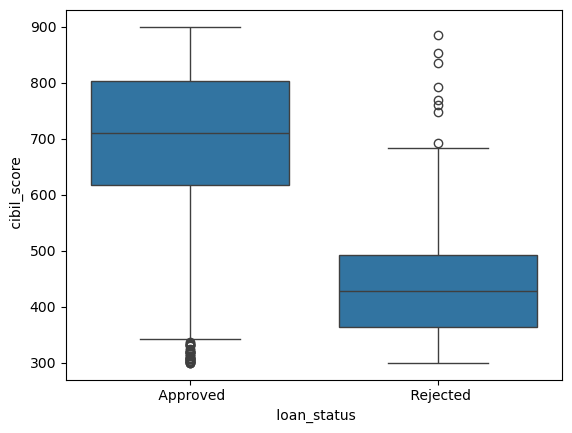

In [24]:
sns.boxplot(x=' loan_status', y=' cibil_score', data=df)

Higher credit score -> Faster approval, converse is true. Although there are many outlier in both the cases

Removing the Outliers

In [25]:
df[(df[" cibil_score"] < 320) & (df[" loan_status"] == " Approved")].shape

(22, 14)

In [26]:
df[(df[" cibil_score"] > 700) & (df[" loan_status"] == " Rejected")].shape

(7, 14)

In [27]:
df = df[~((df[" cibil_score"] > 700) & (df[" loan_status"] == " Rejected"))]

In [28]:
df = df[~((df[" cibil_score"] < 350) & (df[" loan_status"] == " Approved"))]

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

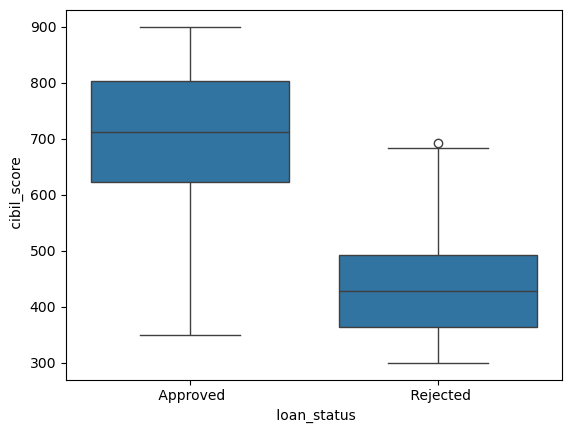

In [29]:
sns.boxplot(x=' loan_status', y=' cibil_score', data=df)

In [30]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status',
       'loan_to_income'],
      dtype='object')

#### residential_assets_value

In [31]:
df[" residential_assets_value"].min()

-100000

In [32]:
df[df[" residential_assets_value"]<0].shape

(27, 14)

So basically there are 27 rows in which the value is negative, this means these values are Nan values

In [33]:
df = df[df[' residential_assets_value'] != -100000]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4194 non-null   int64  
 1    no_of_dependents          4194 non-null   int64  
 2    education                 4194 non-null   object 
 3    self_employed             4194 non-null   object 
 4    income_annum              4194 non-null   int64  
 5    loan_amount               4194 non-null   int64  
 6    loan_term                 4194 non-null   int64  
 7    cibil_score               4194 non-null   int64  
 8    residential_assets_value  4194 non-null   int64  
 9    commercial_assets_value   4194 non-null   int64  
 10   luxury_assets_value       4194 non-null   int64  
 11   bank_asset_value          4194 non-null   int64  
 12   loan_status               4194 non-null   object 
 13  loan_to_income             4194 non-null   float64
dt

In [35]:
df[" residential_assets_value"].describe()

count    4.194000e+03
mean     7.524511e+06
std      6.492733e+06
min      0.000000e+00
25%      2.200000e+06
50%      5.700000e+06
75%      1.130000e+07
max      2.910000e+07
Name:  residential_assets_value, dtype: float64

<Axes: xlabel=' loan_status', ylabel=' residential_assets_value'>

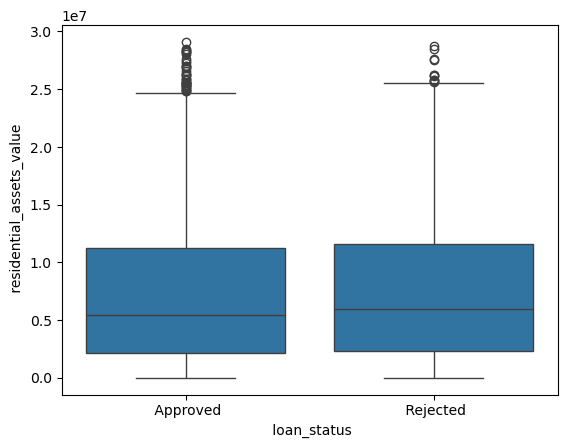

In [36]:
sns.boxplot(x=' loan_status', y=' residential_assets_value', data=df)

So basically there is not a much effect of residental values to loan status

In [37]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status',
       'loan_to_income'],
      dtype='object')

In [38]:
df[" commercial_assets_value"].describe()

count    4.194000e+03
mean     4.989604e+06
std      4.379507e+06
min      0.000000e+00
25%      1.400000e+06
50%      3.700000e+06
75%      7.700000e+06
max      1.940000e+07
Name:  commercial_assets_value, dtype: float64

<Axes: xlabel=' loan_status', ylabel=' commercial_assets_value'>

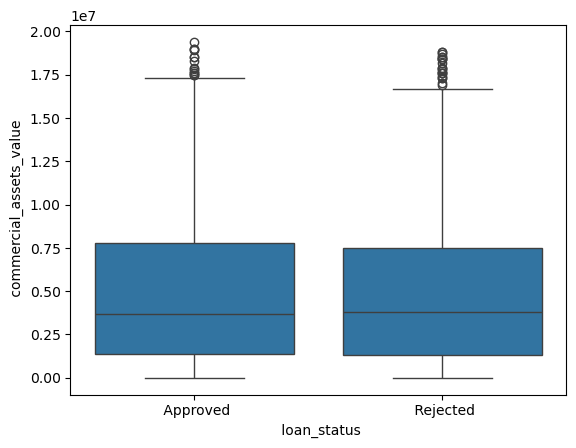

In [39]:
sns.boxplot(x=' loan_status', y=' commercial_assets_value', data=df)

<Axes: xlabel=' loan_status', ylabel=' bank_asset_value'>

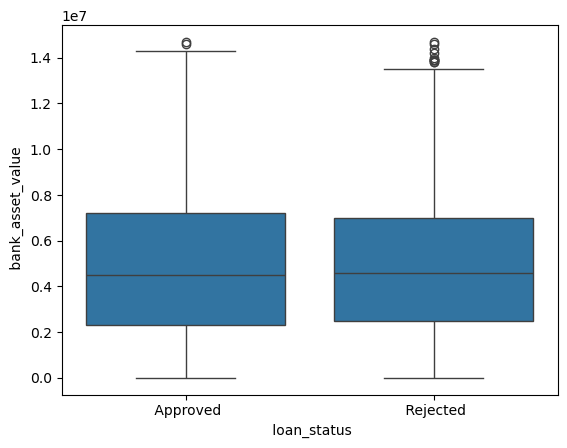

In [40]:
sns.boxplot(x=' loan_status', y=' bank_asset_value', data=df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4194 non-null   int64  
 1    no_of_dependents          4194 non-null   int64  
 2    education                 4194 non-null   object 
 3    self_employed             4194 non-null   object 
 4    income_annum              4194 non-null   int64  
 5    loan_amount               4194 non-null   int64  
 6    loan_term                 4194 non-null   int64  
 7    cibil_score               4194 non-null   int64  
 8    residential_assets_value  4194 non-null   int64  
 9    commercial_assets_value   4194 non-null   int64  
 10   luxury_assets_value       4194 non-null   int64  
 11   bank_asset_value          4194 non-null   int64  
 12   loan_status               4194 non-null   object 
 13  loan_to_income             4194 non-null   float64
dt

Total Approved:

In [42]:
df[df[" loan_status"]==" Approved"].shape[0] / df.shape[0]

0.6196948020982356

Total Rejected:

In [43]:
df[df[" loan_status"]==" Rejected"].shape[0] / df.shape[0]

0.3803051979017644

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4194 non-null   int64  
 1    no_of_dependents          4194 non-null   int64  
 2    education                 4194 non-null   object 
 3    self_employed             4194 non-null   object 
 4    income_annum              4194 non-null   int64  
 5    loan_amount               4194 non-null   int64  
 6    loan_term                 4194 non-null   int64  
 7    cibil_score               4194 non-null   int64  
 8    residential_assets_value  4194 non-null   int64  
 9    commercial_assets_value   4194 non-null   int64  
 10   luxury_assets_value       4194 non-null   int64  
 11   bank_asset_value          4194 non-null   int64  
 12   loan_status               4194 non-null   object 
 13  loan_to_income             4194 non-null   float64
dt

##### Training a Model

In [71]:
data = df.copy()

In [72]:
df= df.drop(["loan_id", "loan_to_income"], axis =1)

In [73]:
df[" loan_status"] = df[" loan_status"].replace(
    {
        " Approved": 1,
        " Rejected": 0
    }
)

C:\Users\Anas\AppData\Local\Temp\ipykernel_1112\3482704164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[" loan_status"] = df[" loan_status"].replace(


In [74]:
df[" loan_status"]

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4194, dtype: int64

In [75]:
categorial_data = [" education", " self_employed"]

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ColumnTransformer for One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorial_data)
    ],
    remainder="passthrough"  # ✅ This keeps all non-categorical columns
)

In [77]:
encoded_array = preprocessor.fit_transform(df)

In [78]:
encoded_df = pd.DataFrame(encoded_array, columns=preprocessor.get_feature_names_out())

In [79]:
encoded_df

,cat__ education_ Graduate,cat__ education_ Not Graduate,cat__ self_employed_ No,cat__ self_employed_ Yes,remainder__ no_of_dependents,remainder__ income_annum,remainder__ loan_amount,remainder__ loan_term,remainder__ cibil_score,remainder__ residential_assets_value,remainder__ commercial_assets_value,remainder__ luxury_assets_value,remainder__ bank_asset_value,remainder__ loan_status
0,1.0,0.0,1.0,0.0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,1.0
1,0.0,1.0,0.0,1.0,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,0.0
2,1.0,0.0,1.0,0.0,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,0.0
3,1.0,0.0,1.0,0.0,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,0.0
4,0.0,1.0,0.0,1.0,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1.0,0.0,0.0,1.0,5.0,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0,0.0
4190,0.0,1.0,0.0,1.0,0.0,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,1.0
4191,0.0,1.0,1.0,0.0,2.0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,0.0
4192,0.0,1.0,1.0,0.0,1.0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,1.0


In [80]:
encoded_df.columns

Index(['cat__ education_ Graduate', 'cat__ education_ Not Graduate',
       'cat__ self_employed_ No', 'cat__ self_employed_ Yes',
       'remainder__ no_of_dependents', 'remainder__ income_annum',
       'remainder__ loan_amount', 'remainder__ loan_term',
       'remainder__ cibil_score', 'remainder__ residential_assets_value',
       'remainder__ commercial_assets_value',
       'remainder__ luxury_assets_value', 'remainder__ bank_asset_value',
       'remainder__ loan_status'],
      dtype='object')

In [82]:
X = encoded_df.drop(["remainder__ loan_status"], axis=1)
y = encoded_df["remainder__ loan_status"]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=27)

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtree = DecisionTreeClassifier()

In [88]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
print(f"""
{X_train.shape}
{X_test.shape}
{y_train.shape}
{y_test.shape}
""")


(3355, 13)
(839, 13)
(3355,)
(839,)



In [90]:
y_predict = dtree.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [99]:
confusion_matrix(y_test, y_predict)

array([[309,  10],
       [  7, 513]], dtype=int64)

In [100]:
accuracy_score(y_test, y_predict)

0.9797377830750894

In [102]:
importances = dtree.feature_importances_
importances

array([0.00000000e+00, 8.43133027e-04, 0.00000000e+00, 0.00000000e+00,
       2.74018234e-03, 2.72886708e-02, 2.93893362e-02, 5.22533500e-02,
       8.78322081e-01, 2.05888835e-03, 0.00000000e+00, 5.56865130e-03,
       1.53570658e-03])

In [107]:
columns = X.columns.tolist()

The most important Features: cibil_score, 

In [110]:
for i in range(13):
    print(f"{columns[i]}: {importances[i]}")

cat__ education_ Graduate: 0.0
cat__ education_ Not Graduate: 0.0008431330270410728
cat__ self_employed_ No: 0.0
cat__ self_employed_ Yes: 0.0
remainder__ no_of_dependents: 0.0027401823378834862
remainder__ income_annum: 0.02728867083501251
remainder__ loan_amount: 0.029389336176578205
remainder__ loan_term: 0.0522533499924562
remainder__ cibil_score: 0.8783220813956639
remainder__ residential_assets_value: 0.002058888351176745
remainder__ commercial_assets_value: 0.0
remainder__ luxury_assets_value: 0.005568651299220176
remainder__ bank_asset_value: 0.001535706584967668


remainder__ income_annum: 0.02728867083501251
remainder__ loan_amount: 0.029389336176578205
remainder__ loan_term: 0.0522533499924562
remainder__ cibil_score: 0.8783220813956639
remainder__ residential_assets_value: 0.002058888351176745

#### The most important features:
- cibil score
- loan term
- loan amount
- income annum
- residental assets value